In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
proj = loadArchRProject(file.path(PROJDIR,'ArchR_multiomeATAC_DLPFC'), showLogo = FALSE)
projNeuron = loadArchRProject(file.path(PROJDIR,'ArchR_multiomeATAC_DLPFC_neuron'), showLogo = FALSE)
projGlia = loadArchRProject(file.path(PROJDIR,'ArchR_multiomeATAC_DLPFC_glia'), showLogo = FALSE)

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!



# Add predictedRNA2ATAC co-clustering labels from sub-analyses

In [4]:
df_Neuron = getCellColData(projNeuron)
df_Glia = getCellColData(projGlia)

columns = names(getCellColData(projGlia))
df_label = rbind(df_Neuron[,columns],df_Glia[,columns] )
head(df_label)

DataFrame with 6 rows and 25 columns
                                        Sample TSSEnrichment ReadsInTSS
                                   <character>     <numeric>  <numeric>
London_DLPFC-1#TGCTAACAGTCAGTAC London_DLPFC-1         7.687       3125
London_DLPFC-1#GCAATGAAGCACGATT London_DLPFC-1         9.095       3918
London_DLPFC-1#TGCTTGCTCGCAAACT London_DLPFC-1         10.86       4404
London_DLPFC-1#TGGATTCAGTAACGAG London_DLPFC-1         8.115       3213
London_DLPFC-1#GAGCTGCTCCGCCTAT London_DLPFC-1         9.947       3687
London_DLPFC-1#TATCACGCAATCATGT London_DLPFC-1        10.469       3944
                                ReadsInPromoter     PromoterRatio    PassQC
                                      <numeric>         <numeric> <numeric>
London_DLPFC-1#TGCTAACAGTCAGTAC           19852 0.102250836981715         1
London_DLPFC-1#GCAATGAAGCACGATT           24096 0.126219186405875         1
London_DLPFC-1#TGCTTGCTCGCAAACT           25357 0.133471944415202         1
London_

In [5]:
## transfer labels via cell barcodes
proj <- addCellColData(ArchRProj = proj, data = df_label$predictedGroup_RNA2ATACCo,
    cells = rownames(df_label), name = "predictedGroup_RNA2ATACCo", force = TRUE)
proj$predictedGroup_RNA2ATACCo = gsub('/', '-', proj$predictedGroup_RNA2ATACCo)
proj$predictedGroup_RNA2ATACCo = gsub('\\+', '', proj$predictedGroup_RNA2ATACCo)
proj$predictedGroup_RNA2ATACCo = make.names(proj$predictedGroup_RNA2ATACCo)

## subset to cells with integrated labels
idxPass <- which(!is.na(proj$predictedGroup_RNA2ATACCo) & 
                 proj$predictedGroup_RNA2ATACCo %ni% c('Drop', 'NA.', 'TH') & 
                 proj$ClustersH230_ATAC %ni% c('C1', 'C4', 'C6', 'C25')) # doublet cluster

cellsPass <- proj$cellNames[idxPass]
proj = proj[cellsPass, ]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [6]:
table(proj$predictedGroup_RNA2ATACCo)


   Astrocytes   Endothelial L2.CUX2.MEIS2  L3.CUX2.RORB    L4.5.TBX15 
         3234           774          3458           606           727 
      L4.ALPL        L4.TYR    L5.6.NR4A2       L5.PCP4      L6.ITGA8 
          915           458           131           164           412 
      L6.NKD1       L6.SYT6         LAMP5     Microglia          NDNF 
          154           178           311          1457           290 
    Oligo_Pre        Oligos      PVALB.BC     PVALB.ChC           SST 
          930          1649           547           320           869 
          VIP 
          538 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6c4624357461-Date-2021-09-22_Time-18-31-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6c4624357461-Date-2021-09-22_Time-18-31-00.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6c46652d2f9-Date-2021-09-22_Time-18-31-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6c46652d2f9-Date-2021-09-22_Time-18-31-02.log



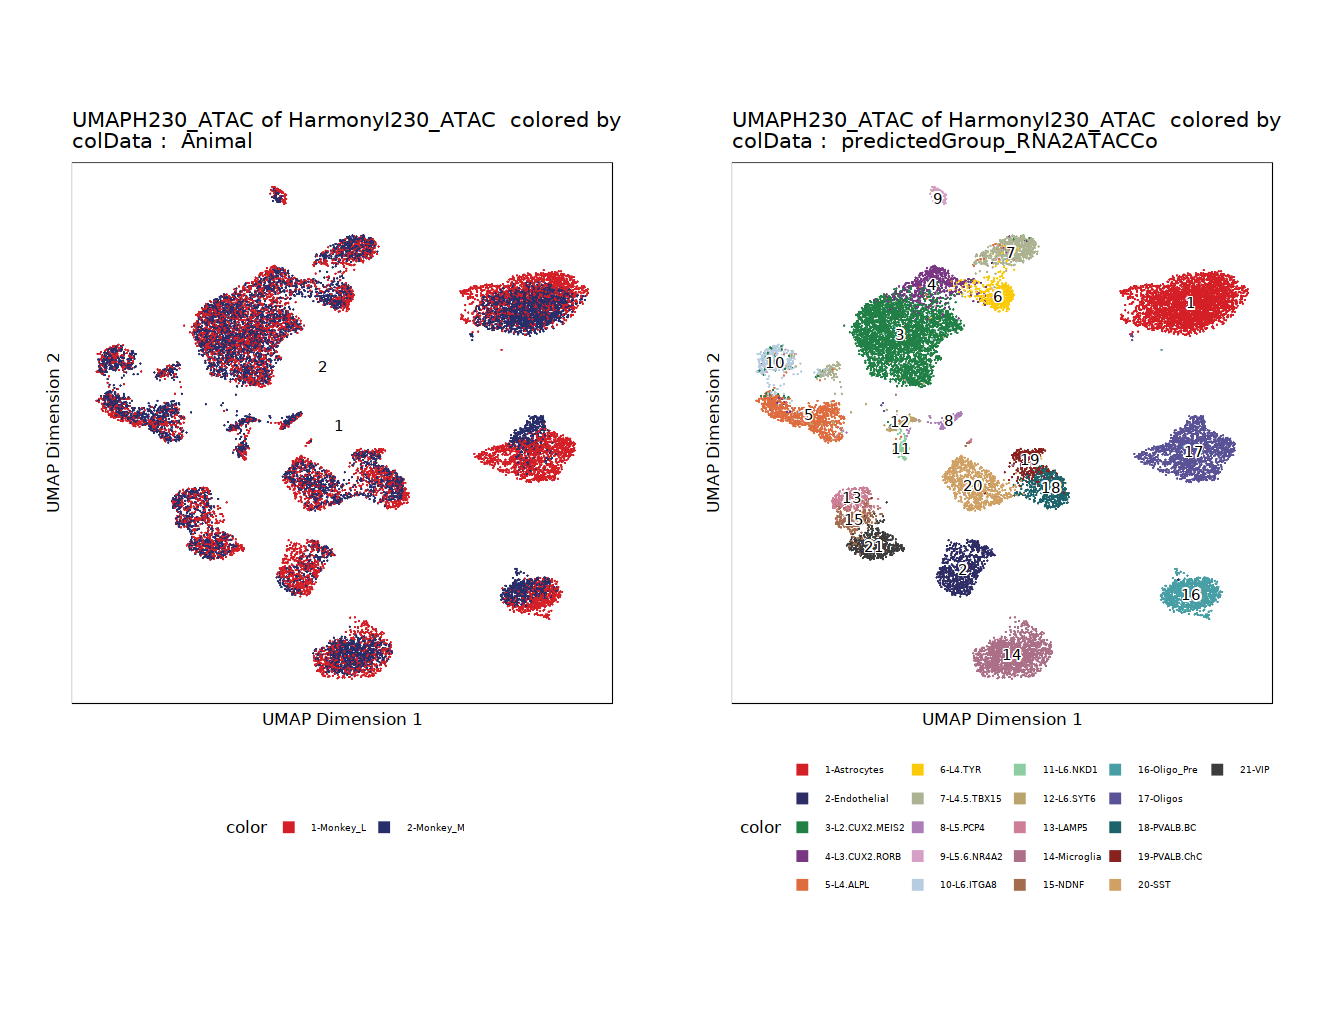

In [7]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Animal", embedding = "UMAPH230_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo", embedding = "UMAPH230_ATAC")


ggAlignPlots(p1, p2,  type = "h")

In [8]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

# Call peaks using integrated clusters

In [9]:
# make group coverage, call peaks, and 
proj<-addGroupCoverages(proj, groupBy="predictedGroup_RNA2ATACCo", 
                        minReplicates = 2, maxReplicates = 12, force = TRUE,
                        minCells = 40, maxCells = 1000)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-6c467aab181d-Date-2021-09-22_Time-18-36-17.log
If there is an issue, please report to github with logFile!

Astrocytes (1 of 21) : CellGroups N = 2

Endothelial (2 of 21) : CellGroups N = 2

L2.CUX2.MEIS2 (3 of 21) : CellGroups N = 2

L3.CUX2.RORB (4 of 21) : CellGroups N = 2

L4.ALPL (5 of 21) : CellGroups N = 2

L4.TYR (6 of 21) : CellGroups N = 2

L4.5.TBX15 (7 of 21) : CellGroups N = 2

L5.PCP4 (8 of 21) : CellGroups N = 2

L5.6.NR4A2 (9 of 21) : CellGroups N = 2

L6.ITGA8 (10 of 21) : CellGroups N = 2

L6.NKD1 (11 of 21) : CellGroups N = 2

L6.SYT6 (12 of 21) : CellGroups N = 2

LAMP5 (13 of 21) : CellGroups N = 2

Microglia (14 of 21) : CellGroups N = 2

NDNF (15 of 21) : CellGroups N = 2

Oligo_Pre (16 of 21) : CellGroups N = 2

Oligos (17 of 21) : CellGroups N = 2

PVALB.BC (18 of 21) : CellGroups N = 2

PVALB.ChC (19 of 21) : CellGroups N = 2

SST (20 of 21) : CellGroups N = 2

VIP (21 of 21) : CellGroups N = 2

2021-09-22 1

In [10]:
# call peaks 
proj<-addReproduciblePeakSet(proj, groupBy = "predictedGroup_RNA2ATACCo", 
                             plot = FALSE, genomeSize = 2.7e9)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-6c46111277f2-Date-2021-09-22_Time-19-18-37.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2021-09-22 19:18:41 : Peak Calling Parameters!, 0.069 mins elapsed.



                      Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astrocytes       Astrocytes   3234       1000           2  500  500   150000
Endothelial     Endothelial    774        772           2  272  500   150000
L2.CUX2.MEIS2 L2.CUX2.MEIS2   3458       1000           2  500  500   150000
L3.CUX2.RORB   L3.CUX2.RORB    606        606           2  280  326   150000
L4.ALPL             L4.ALPL    915        841           2  341  500   150000
L4.TYR               L4.TYR    458        458           2  199  259   150000
L4.5.TBX15       L4.5.TBX15    727        727           2  317  410   150000
L5.PCP4             L5.PCP4    164        164           2   60  104    82000
L5.6.NR4A2       L5.6.NR4A2    131        131           2   60   71    65500
L6.ITGA8           L6.ITGA8    412        412           2  162  250   150000
L6.NKD1             L6.NKD1    154        154           2   60   94    77000
L6.SYT6             L6.SYT6    178        178           2   61  117    89000

2021-09-22 19:18:41 : Batching Peak Calls!, 0.07 mins elapsed.

2021-09-22 19:18:41 : Batch Execution w/ safelapply!, 0 mins elapsed.

2021-09-22 20:41:38 : Identifying Reproducible Peaks!, 83.018 mins elapsed.

2021-09-22 20:44:39 : Creating Union Peak Set!, 86.031 mins elapsed.

Converged after 24 iterations!

2021-09-22 20:44:55 : Finished Creating Union Peak Set (409840)!, 86.301 mins elapsed.



In [11]:
# add peak counts matrix 
proj <- addPeakMatrix(proj)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-6c461def6313-Date-2021-09-22_Time-20-44-55.log
If there is an issue, please report to github with logFile!

2021-09-22 20:44:56 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-6c461def6313-Date-2021-09-22_Time-20-44-55.log



In [12]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [13]:
# add motif enrichment matrix
proj <- addMotifAnnotations(ArchRProj = proj, motifSet = "JASPAR2018", name = "Motif")

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-6c467fbba6e8-Date-2021-09-22_Time-20-50-00.log
If there is an issue, please report to github with logFile!

2021-09-22 20:50:05 : Gettting Motif Set, Species : , 0.008 mins elapsed.

2021-09-22 20:51:37 : Finding Motif Positions with motifmatchr!, 1.542 mins elapsed.

2021-09-22 21:13:32 : Creating Motif Overlap Matrix, 23.467 mins elapsed.

2021-09-22 21:13:49 : Finished Getting Motif Info!, 23.743 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-6c467fbba6e8-Date-2021-09-22_Time-20-50-00.log



In [14]:
# # add motif deviations matrix
proj <- addBgdPeaks(proj)
proj <- addDeviationsMatrix(proj,  peakAnnotation = "Motif", force = TRUE)

Identifying Background Peaks!

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-6c46709fd213-Date-2021-09-22_Time-21-15-54.log
If there is an issue, please report to github with logFile!



NULL


2021-09-22 21:16:03 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2021-09-23 01:06:59 : Completed Computing Deviations!, 231.091 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-6c46709fd213-Date-2021-09-22_Time-21-15-54.log



In [15]:
# add co-accessibility matrix
proj <- addCoAccessibility(proj, reducedDims = "HarmonyI230_ATAC", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-6c46292e2fef-Date-2021-09-23_Time-01-07-01.log
If there is an issue, please report to github with logFile!

2021-09-23 01:07:04 : Computing KNN, 0.052 mins elapsed.

2021-09-23 01:07:04 : Identifying Non-Overlapping KNN pairs, 0.055 mins elapsed.

2021-09-23 01:07:07 : Identified 488 Groupings!, 0.106 mins elapsed.

2021-09-23 01:07:13 : Computing Co-Accessibility chr1 (1 of 21), 0.208 mins elapsed.

2021-09-23 01:07:38 : Computing Co-Accessibility chr2 (2 of 21), 0.62 mins elapsed.

2021-09-23 01:07:56 : Computing Co-Accessibility chr3 (3 of 21), 0.913 mins elapsed.

2021-09-23 01:08:13 : Computing Co-Accessibility chr4 (4 of 21), 1.206 mins elapsed.

2021-09-23 01:08:29 : Computing Co-Accessibility chr5 (5 of 21), 1.464 mins elapsed.

2021-09-23 01:08:42 : Computing Co-Accessibility chr6 (6 of 21), 1.678 mins elapsed.

2021-09-23 01:08:58 : Computing Co-Accessibility chr7 (7 of 21), 1.943 mins elapsed.

2021-09-23 01:09:16 : Compu

In [16]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         